# Proyecto 05 - Transformación y Mapeo de Datos
## Por Ricardo A. Del Río Guzmán


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de Librerías


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd, chdir, listdir
from scipy.stats import trim_mean as tm
import datetime

# from sys import path
# path.append('/content/drive/My Drive/__libreras_propias')
# from info_tables import *
# from ipynb.fs.defs.info_tables import CatDataStruc

chdir('/content/drive/My Drive/__libreras_propias')
%run info_tables.ipynb
chdir('/content/drive/My Drive/Proyecto 05')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Definiciones de Clases, Funciones y Variables

In [0]:
def save_graph(name):
  org_dir = getcwd()
  chdir('/content/drive/My Drive/Proyecto 05/Imágenes')
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")
  chdir(org_dir)

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')

def correlation_map(dataframe, titulo):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor al 50%
  corr_pd = corr_pd[abs(corr_pd) >= 0.3]

  plt.figure(figsize=(15, 6))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=True, mask=mask, cmap='RdBu_r')
  plt.title(titulo, fontsize=20)
  save_graph(modify_text(titulo))
  plt.show()
  print()

def char(c):
  '''
  Cambia los carrácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]

In [0]:
def boxplot_graph(column, name, sec=False):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  if sec:
    save_graph(modify_text('Boxplot limpio de Columna ' + name))
  else:
    save_graph(modify_text('Boxplot de Columna ' + name))
  plt.show()

  

## Formatos y Configuraciones

In [0]:
!pip install matplotlib==3.1.0


In [0]:
sns.set(style='whitegrid')

## Carga de Datos


https://www.kaggle.com/abecklas/fifa-world-cup#WorldCupPlayers.csv


In [0]:
# Se define la ubicación donde se guardarán los datos de las columnas y 
# categorías:
DataBaseTable.set_dir('/content/drive/My Drive/Proyecto 05')

# Se carga la información de las columnas y categorías de cada tabla:
wc_matches_info = DataBaseTable('Partidos Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCupMatches.csv')
wc_players_info = DataBaseTable('Jugadores Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCupPlayers.csv')
wc_info         = DataBaseTable('Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCups.csv')

# Se guardan las bases de datos en una lista:
dbs = [wc_matches_info, wc_players_info, wc_info]


Eventos:

G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out

In [0]:
print('La columna "{}" es de tipo "{}"\nProcesando...'\
      .format(wc_info.get_column('asistentes').name, wc_info.table.asistentes.dtype))

for i in range(len(wc_info.table.asistentes)):
  wc_info.table.at[i, 'asistentes'] = int(wc_info.table.asistentes[i].replace('.',''))
wc_info.table.asistentes = pd.to_numeric(wc_info.table.asistentes)

print('La columna "{}" es de tipo "{}"\n\n'\
      .format(wc_info.get_column('asistentes').name, wc_info.table.asistentes.dtype))

La columna "asistentes" es de tipo "object"
Procesando...
La columna "asistentes" es de tipo "int64"




In [0]:
wcm = wc_matches_info.table
print('La columna "{}" es de tipo "{}"\nProcesando...'\
      .format('fecha_y_hora', wcm.fecha_y_hora.dtype))

wcm.fecha_y_hora = pd.to_datetime(wcm.fecha_y_hora)

print('La columna "{}" es de tipo "{}"'\
      .format('fecha_y_hora', wcm.fecha_y_hora.dtype))

La columna "fecha_y_hora" es de tipo "object"
Procesando...
La columna "fecha_y_hora" es de tipo "datetime64[ns]"


## 1) Análisis Exploratorio Inicial
Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.

### Medidas Descriptivas

In [0]:
# Se hace el análisis de medidas descriptivas a cada base de datos:
for db in dbs:
  analisis(db.table, db.name)  

La base de datos "Partidos Copas Mundiales" tiene 4572 filas y 20 columnas.



,año,fecha_y_hora,etapa,estadio,ciudad,equipo_local,goles_del_equipo_local,goles_del_equipo_visitante,equipo_visitante,comentarios_de_la_victoria,asistencia,goles_primer_tiempo,goles_segundo_tiempo,árbitro,asistente_1,asistente_2,id_ronda,id_partido,iniciales_local,iniciales_visita
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


,año,goles_del_equipo_local,goles_del_equipo_visitante,asistencia,goles_primer_tiempo,goles_segundo_tiempo,id_ronda,id_partido
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


count    6.814000e+03
mean     7.205579e+07
std      1.383768e+08
min      4.156000e+03
25%      3.342175e+04
50%      4.610050e+04
75%      4.426316e+07
max      3.977730e+08
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Jugadores Copas Mundiales" tiene 37784 filas y 9 columnas.



,id_ronda,id_partido,iniciales_equipo,nombre_entrenador,titularidad,número_camiseta,nombre_jugador,posición,evento
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


,id_ronda,id_partido,número_camiseta
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


count    1.133520e+05
mean     7.467881e+07
std      1.400930e+08
min      2.260000e+02
25%      1.467000e+03
50%      2.564000e+03
75%      9.766595e+07
max      3.975971e+08
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.



,año,país,ganador,segundo_lugar,tercer_lugar,cuarto_lugar,cantidad_de_goles,equipos_calificados,partidos_jugados,asistentes
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700


,año,cantidad_de_goles,equipos_calificados,partidos_jugados,asistentes
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


count    1.000000e+02
mean     1.875039e+06
std      1.071925e+06
min      3.650300e+05
25%      8.769240e+05
50%      1.737014e+06
75%      2.727394e+06
max      3.589819e+06
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________



### Nulos

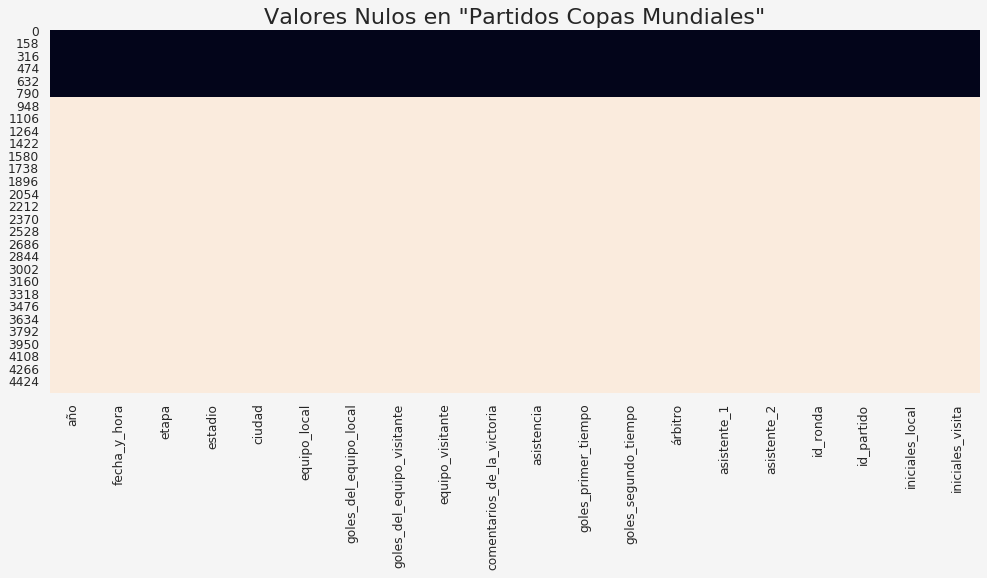

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
año                           852 non-null float64
fecha_y_hora                  852 non-null datetime64[ns]
etapa                         852 non-null object
estadio                       852 non-null object
ciudad                        852 non-null object
equipo_local                  852 non-null object
goles_del_equipo_local        852 non-null float64
goles_del_equipo_visitante    852 non-null float64
equipo_visitante              852 non-null object
comentarios_de_la_victoria    852 non-null object
asistencia                    850 non-null float64
goles_primer_tiempo           852 non-null float64
goles_segundo_tiempo          852 non-null float64
árbitro                       852 non-null object
asistente_1                   852 non-null object
asistente_2                   852 non-null object
id_ronda                      852 non-null float64
id_partido                  

None

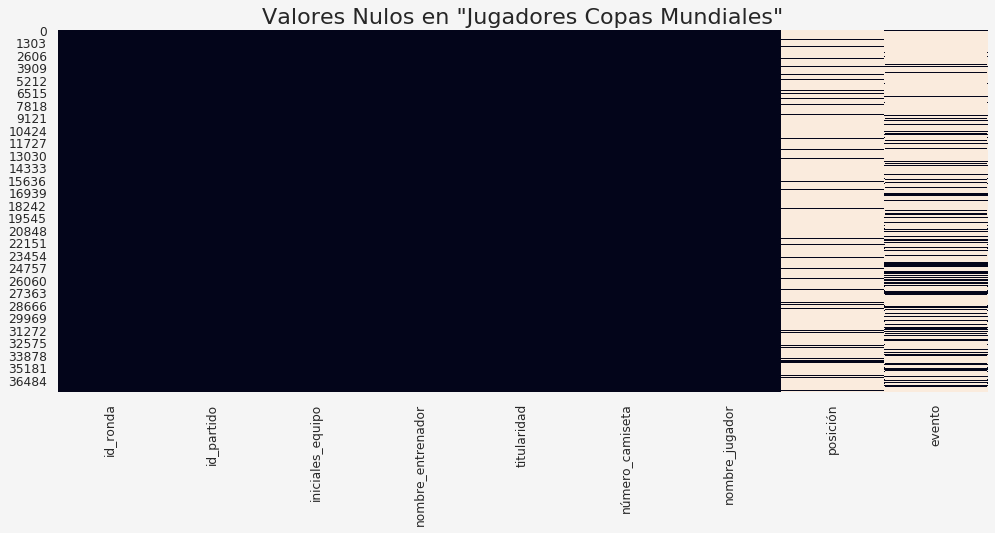

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
id_ronda             37784 non-null int64
id_partido           37784 non-null int64
iniciales_equipo     37784 non-null object
nombre_entrenador    37784 non-null object
titularidad          37784 non-null object
número_camiseta      37784 non-null int64
nombre_jugador       37784 non-null object
posición             4143 non-null object
evento               9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None

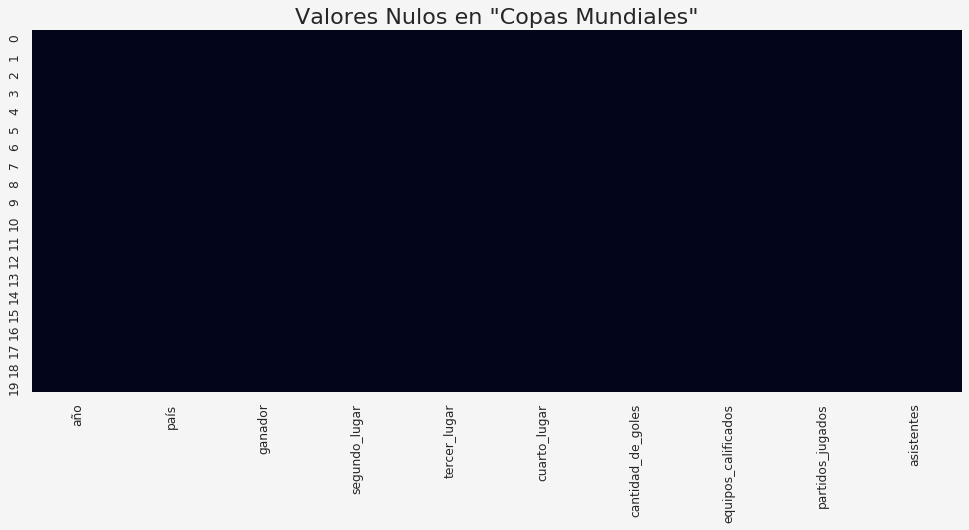

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
año                    20 non-null int64
país                   20 non-null object
ganador                20 non-null object
segundo_lugar          20 non-null object
tercer_lugar           20 non-null object
cuarto_lugar           20 non-null object
cantidad_de_goles      20 non-null int64
equipos_calificados    20 non-null int64
partidos_jugados       20 non-null int64
asistentes             20 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


None

In [0]:
# Se grafican y tabulan los nulos de todas las bases de datos:
for db in dbs:
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.table.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(db.name), fontsize=20)
  save_graph(modify_text('Valores Nulos en "{}"'.format(db.name)))
  plt.show()
  display(db.table.info())
  print()

ANÁLISIS:

La tabla de partidos tiene todos los valores completos hasta la fila 852 y desde ahí en adelante todos los valores son nulos, por lo que se eliminan todas esas filas.

En la tabla de jugadores las columnas de posiciones y eventos tienen una gran cantidad de nulos, pero eliminar estos nulos implicaría perder a una gran cantidad de jugadores y de información útil para los análisis. Es por esto que el tratamiento de estos núlos se dejará para el caso en dónde solo se necesiten los datos de esas columnas y no de los demás jugadores.

En la tabla de copas mundiales no hay nulos.

In [0]:
# Se eliminan las filas vacías de la tabla de partidos:
print('La base de datos {} tiene {} filas y {} columnas\nProcesando...'\
      .format(wc_matches_info.name, wc_matches_info.table.shape[0],
              wc_matches_info.table.shape[1]))
wc_matches_info.table = wc_matches_info.table.iloc[0:852, :]
print('La base de datos {} tiene {} filas y {} columnas'\
      .format(wc_matches_info.name, wc_matches_info.table.shape[0],
              wc_matches_info.table.shape[1]))

La base de datos Partidos Copas Mundiales tiene 4572 filas y 20 columnas
Procesando...
La base de datos Partidos Copas Mundiales tiene 852 filas y 20 columnas


### Tipos de Datos

In [0]:
# Se muestran las columnas categóricas y numéricas de cada tabla:
for df in dbs:
  print(f'BASE DE DATOS: {db.name}\n')
  print(f'Columnas con valores categóricos:"')
  print(list(map(lambda col: col.name, filter(lambda col: col.coltype in ('CAT_ORD', 'CAT_NO_ORD'), df.columns))))
  print(f'\nColumnas con valores numéricos:"')
  print(list(map(lambda col: col.name, filter(lambda col: not (col.coltype in ('CAT_ORD', 'CAT_NO_ORD')), df.columns))))
  print('\n'+ '_'*200 + '\n')

BASE DE DATOS: Copas Mundiales

Columnas con valores categóricos:"
['etapa', 'estadio', 'ciudad', 'equipo_local', 'equipo_visitante', 'comentarios_de_la_victoria', 'árbitro', 'asistente_1', 'asistente_2', 'iniciales_local', 'iniciales_visita']

Columnas con valores numéricos:"
['año', 'fecha_y_hora', 'goles_del_equipo_local', 'goles_del_equipo_visitante', 'asistencia', 'goles_primer_tiempo', 'goles_segundo_tiempo', 'id_ronda', 'id_partido']

________________________________________________________________________________________________________________________________________________________________________________________________________

BASE DE DATOS: Copas Mundiales

Columnas con valores categóricos:"
['iniciales_equipo', 'nombre_entrenador', 'titularidad', 'nombre_jugador', 'posición', 'evento']

Columnas con valores numéricos:"
['id_ronda', 'id_partido', 'número_camiseta']

___________________________________________________________________________________________________________

### Eliminación de Duplicados

In [0]:
for db in dbs:
  print('La base de datos "{}" tiene {} filas y {} columnas.'.format(db.name, db.table.shape[0], db.table.shape[1]))
  print('Eliminando duplicados...')
  db.table.drop_duplicates(inplace=True)
  print('Ahora la base de datos "{}" tiene {} filas y {} columnas.'.format(db.name, db.table.shape[0], db.table.shape[1]))
  print('\n'+ '_'*200 + '\n')

La base de datos "Partidos Copas Mundiales" tiene 852 filas y 20 columnas.
Eliminando duplicados...
Ahora la base de datos "Partidos Copas Mundiales" tiene 836 filas y 20 columnas.

________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Jugadores Copas Mundiales" tiene 37784 filas y 9 columnas.
Eliminando duplicados...
Ahora la base de datos "Jugadores Copas Mundiales" tiene 37048 filas y 9 columnas.

________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.
Eliminando duplicados...
Ahora la base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.

__________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## 2) Tratamiento de Outliers

Identifique y establezca un protocolo para tratar outliers.

### Gráficos Boxplot con Outiers

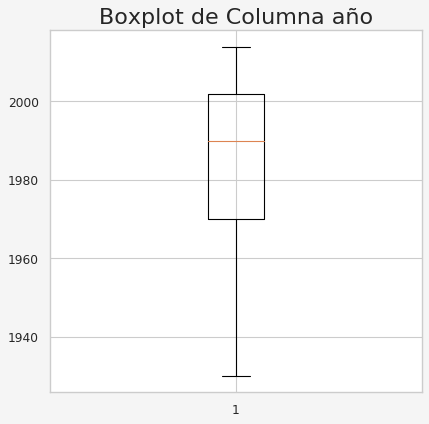

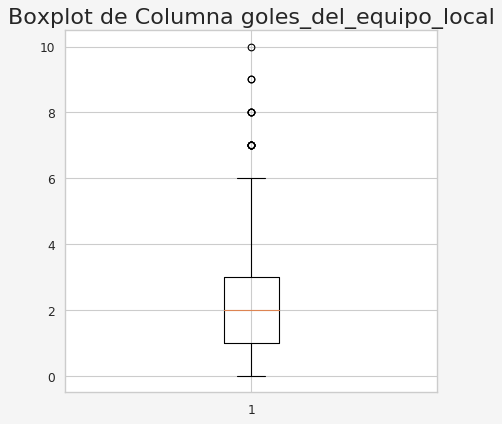

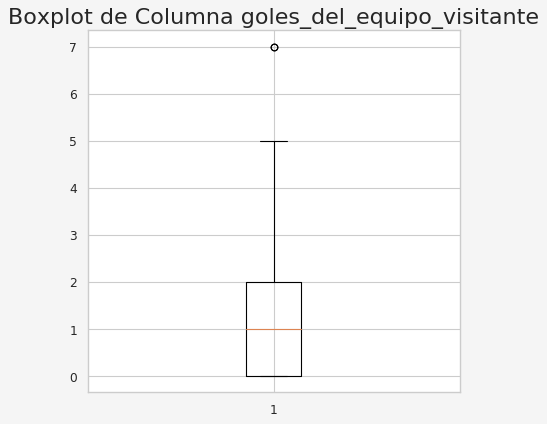

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


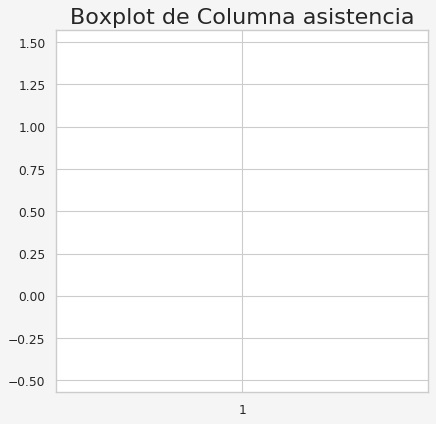

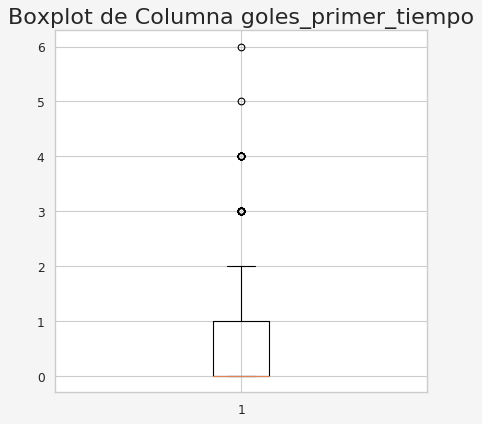

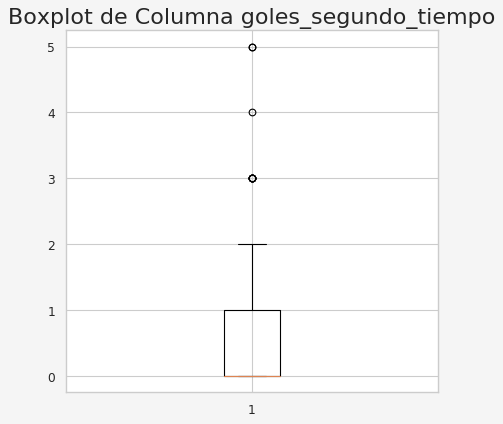

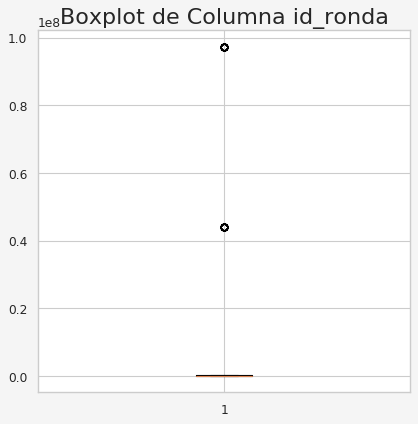

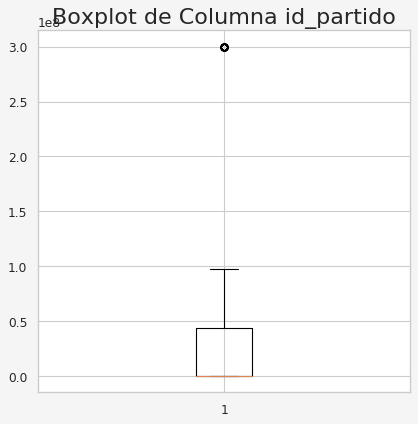

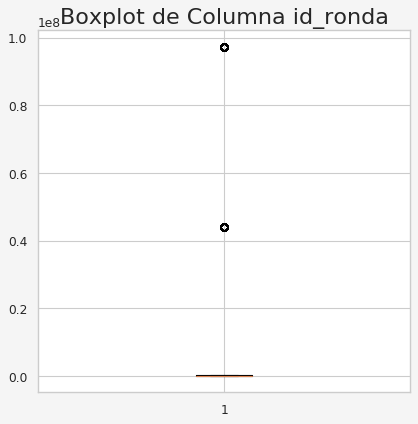

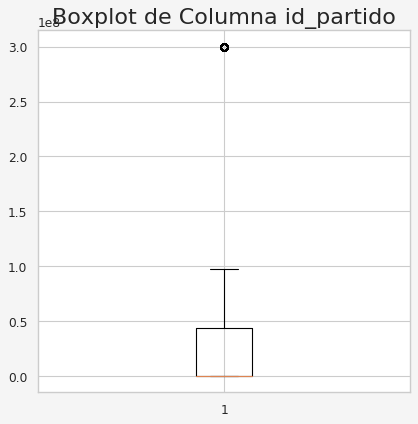

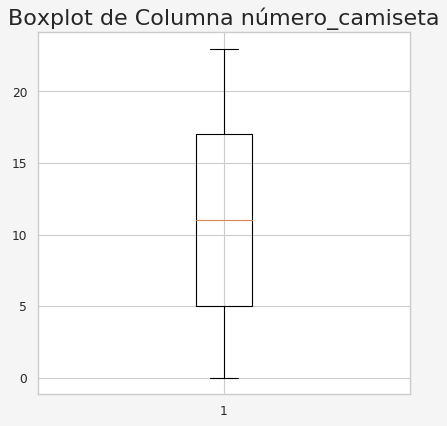

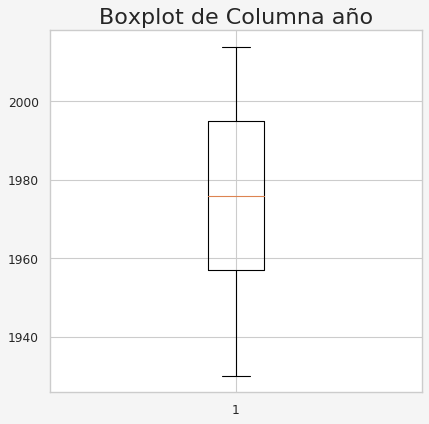

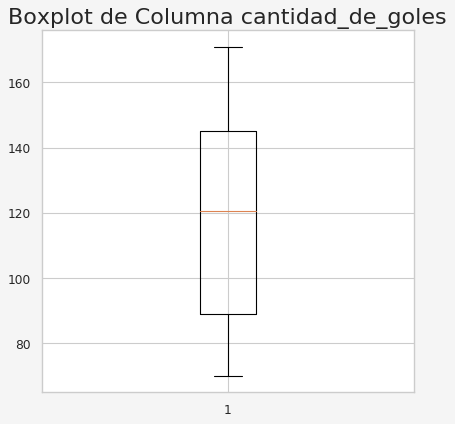

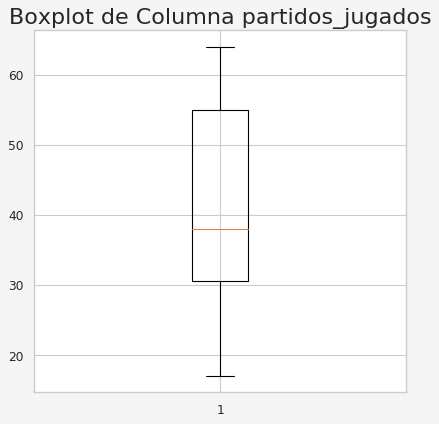

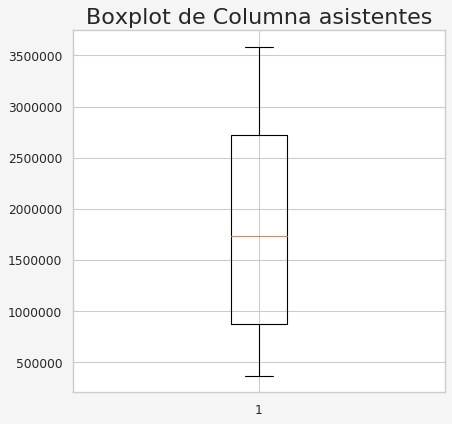

In [0]:
# Gráficos boxplot con outliers:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    boxplot_graph(db.table[col_name], col_name)

### Reemplazo de Outiers

In [0]:
def replace_outliers(df, col_name):
  column = df.loc[:,col_name]
  # Cálculo de la media truncada:
  trim_mean = int(tm(column.values, 0.15, axis=0))

  # Array de datos repetidos para reemplazar:
  data_to_replace = np.repeat(np.c_[trim_mean, trim_mean], 9, axis=1)
  
  # Cálculo de límites:
  upper_lim = column.mean() + 3*column.std()
  lower_lim = column.mean() - 3*column.std()
  
  # Se encuentran los otliers y se reemplazan por la media de los datos truncados:
  without_ol = column\
  .where(column.gt(lower_lim),trim_mean)\
  .where(column.lt(upper_lim), trim_mean)

  # Se guarda la columna modificada en el DataFrame
  df.loc[:,col_name] = without_ol


# Se eliminan los outliers de todas las columnas con datos numéricos:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    replace_outliers(db.table, col_name)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Gráficos Boxplot sin Outliers

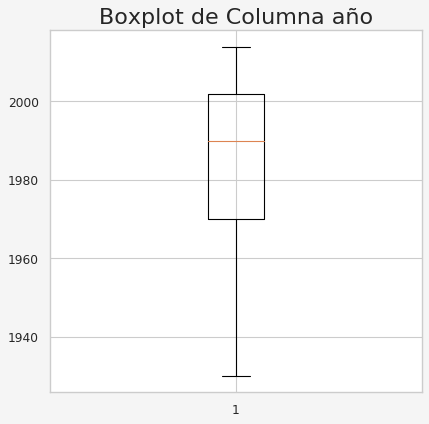

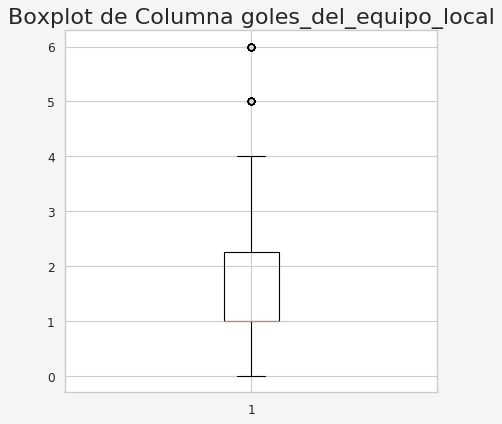

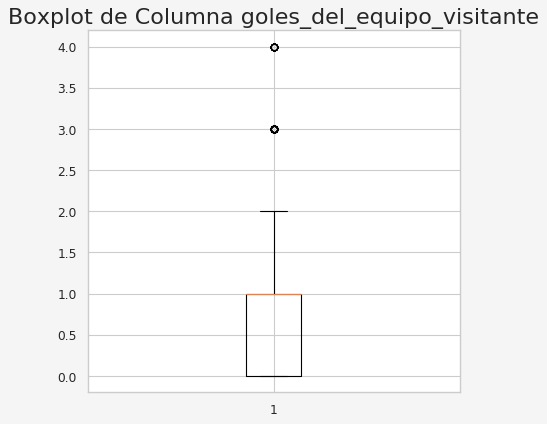

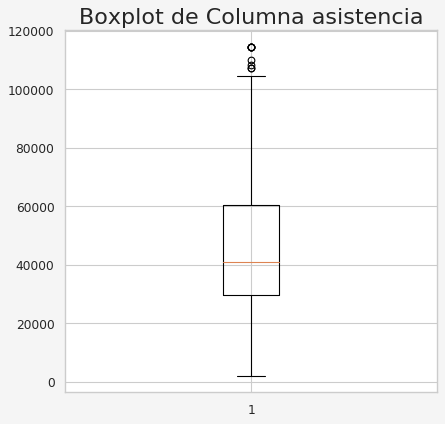

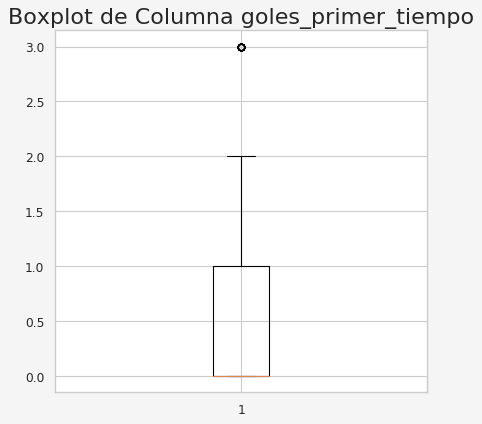

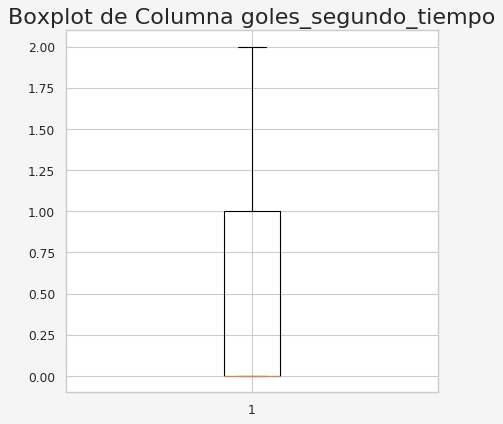

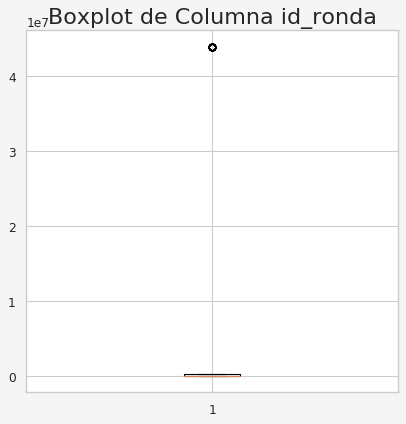

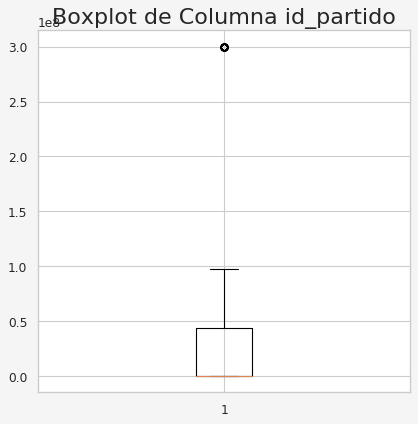

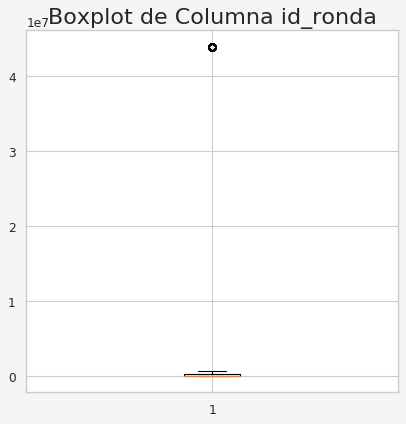

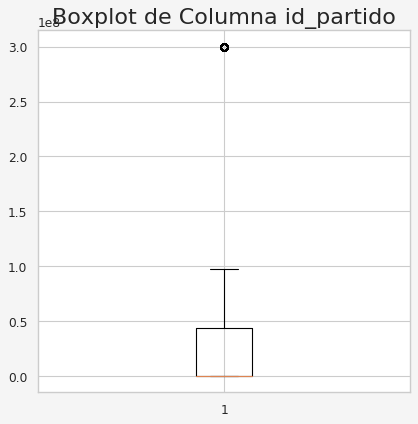

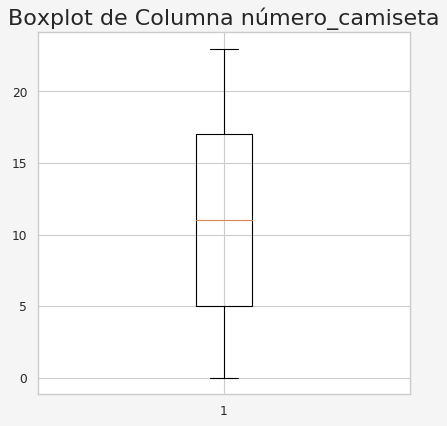

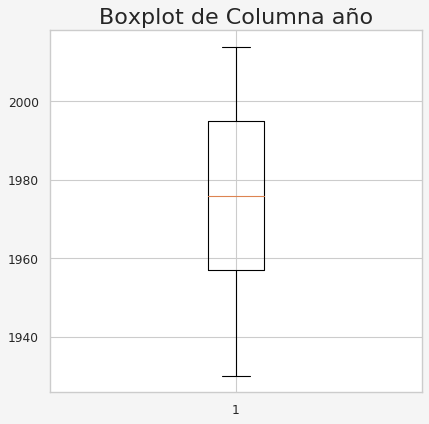

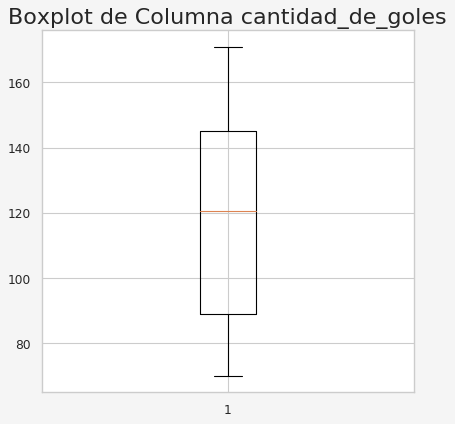

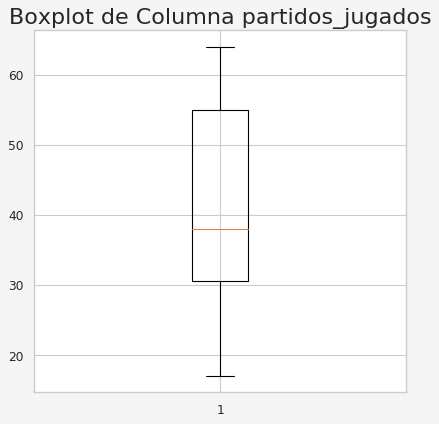

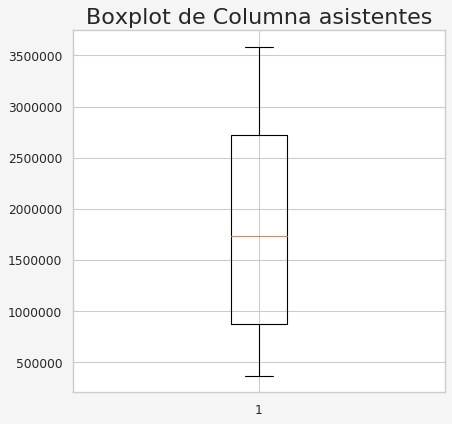

In [0]:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    boxplot_graph(db.table[col_name], col_name, True)

## 3) Visualizaciones

Obtenga visualizaciones pertinentes a su análisis sobre los mundiales.


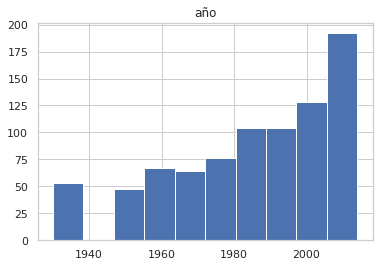

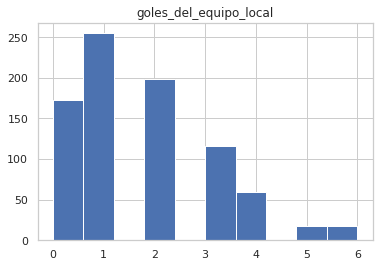

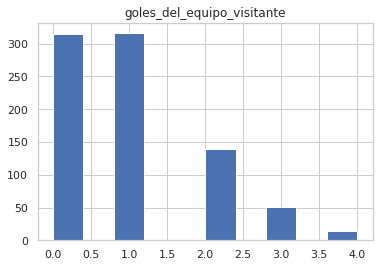

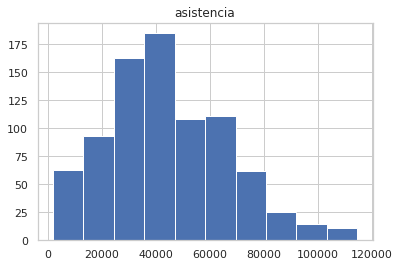

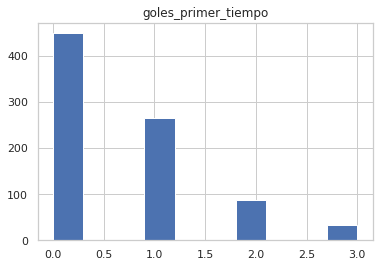

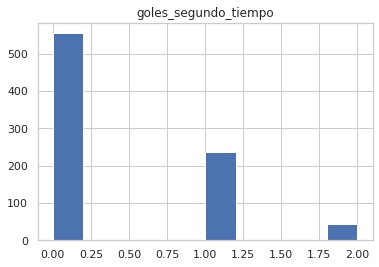

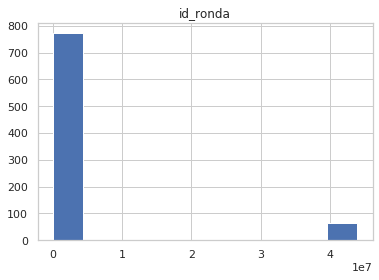

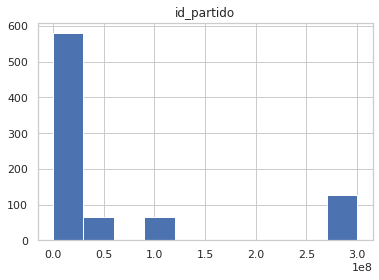

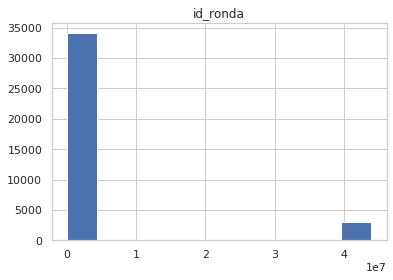

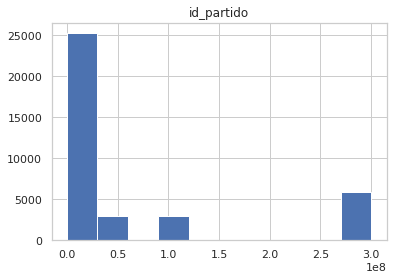

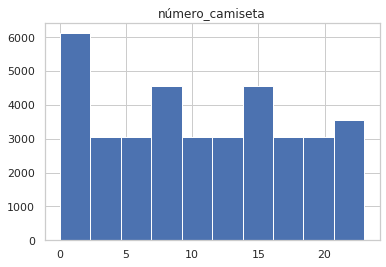

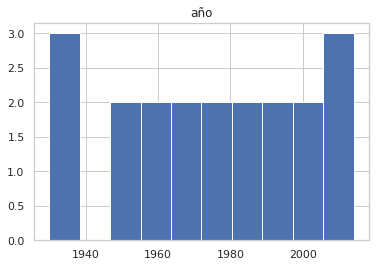

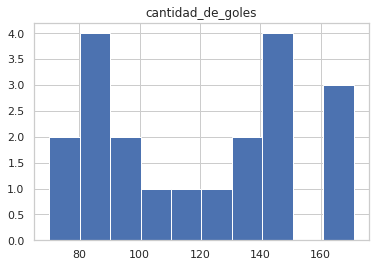

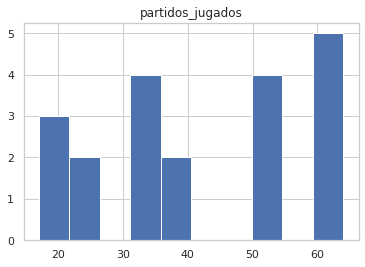

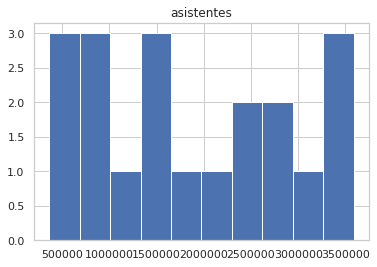

In [0]:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    db.table[col_name].hist()
    plt.title(col_name)
    save_graph(modify_text('histogram'+col_name))
    plt.show()
    print()


## 4) Análisis de la Concurrencia de Público

Hacer un análisis de la concurrencia de público para los años donde se disputó el mundial FIFA, repita lo anterior según los distintos horarios en los que se disputan los encuentros. Indique los partidos con mayor concurrencia de público.


### Análisis por Año


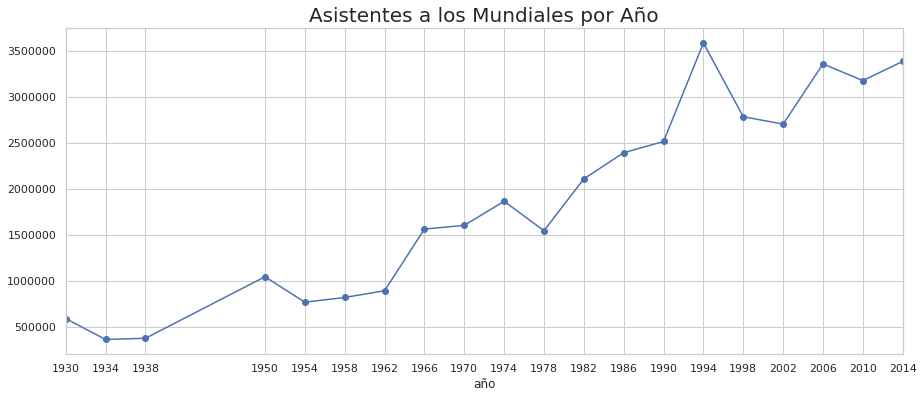

In [0]:
# Se agrupan y muestran los datos:
wc_info.table.groupby('año').sum().asistentes.plot(figsize=(15, 6), style='-o')
# Se configura el gráfico:
plt.title('Asistentes a los Mundiales por Año', fontsize=20)
plt.xticks(wc_info.table.año, wc_info.table.año)
save_graph(modify_text('Asistentes a los Mundiales por Año'))
pass # Para evitar prints no deseados

### Análisis por Horarios

In [0]:
def time(ts):
  return f'{ts.time().hour}:{ts.time().minute:02}'

def to_int(time_str):
  hours = int(time_str[:2])
  mins = int(time_str[3:])
  hours_to_mins = hours*60
  return mins + hours_to_mins

wc_matches_info.table['hora'] = [time(ts) for ts in wc_matches_info.table.fecha_y_hora]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,hora,año,goles_del_equipo_local,goles_del_equipo_visitante,asistencia,goles_primer_tiempo,goles_segundo_tiempo,id_ronda,id_partido
hora_como_int,,,,,,,,,
690,11:30,1994.0,1.000000,1.000000,73425.0,1.00,1.000000,337.000000,3051.000000
720,12:00,1983.6,1.800000,1.120000,52643.0,0.62,0.480000,588.240000,1022.380000
750,12:30,1994.0,1.642857,0.571429,69296.5,0.50,0.214286,815.928571,3078.571429
765,12:45,1930.0,3.000000,0.500000,21182.5,1.00,0.000000,201.000000,1092.500000
770,12:50,1930.0,1.000000,0.000000,2000.0,0.00,0.000000,201.000000,1094.000000


'\nIDEA\n\nHacer que solo se muestren las etiquetas de eje vertical de aquellas crestas\no valles más pronunciados\n'

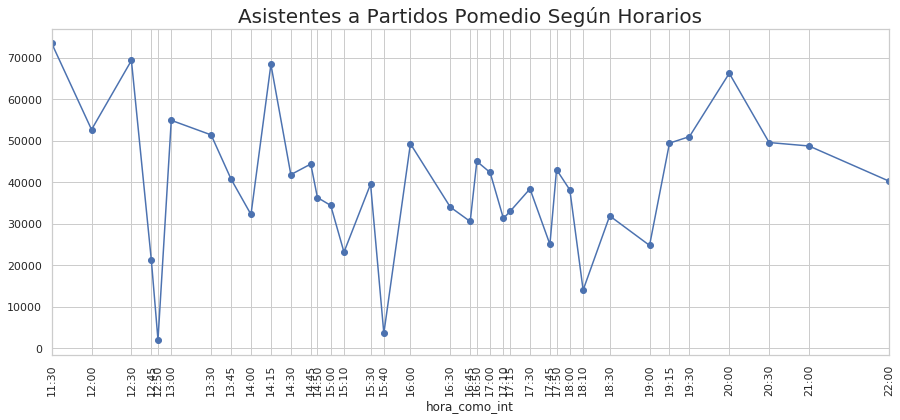

In [0]:
grouped_by_hour = wc_matches_info.table.groupby('hora').mean()

grouped_by_hour['hora_como_int'] = [to_int(hour) for hour in grouped_by_hour.index.values]


grouped_by_hour.reset_index(inplace=True)
grouped_by_hour.set_index('hora_como_int', inplace=True)

display(grouped_by_hour.head())

grouped_by_hour.asistencia.plot(figsize=(15,6), style='-o', rot=90)

plt.title('Asistentes a Partidos Pomedio Según Horarios', fontsize=20)
plt.xticks(grouped_by_hour.index.values, grouped_by_hour.hora)
save_graph(modify_text('Asistentes a Partidos Pomedio Según Horarios'))
pass

'''
IDEA

Hacer que solo se muestren las etiquetas de eje vertical de aquellas crestas
o valles más pronunciados
'''

## 5) Visualización y Análisis de Goles Anotados

Visualice la cantidad de goles anotados por cada uno de los eventos mundialistas. Luego, muestre la distribución de los goles de local y visita. Comente sus resultados.


### Goles por Mundial

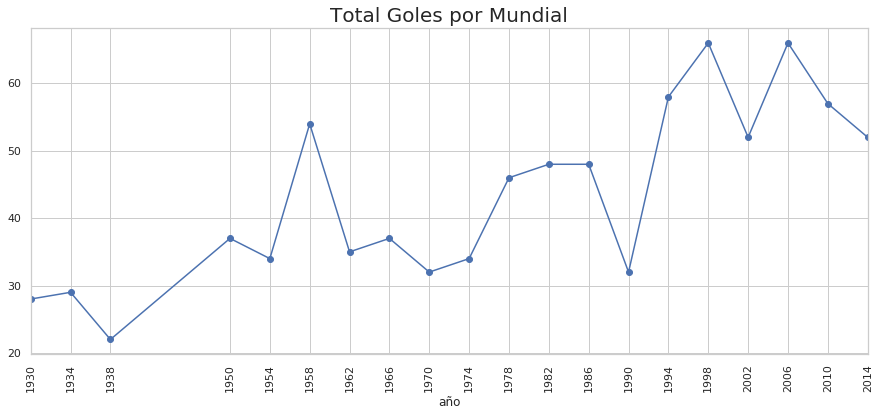

In [0]:
matches = wc_matches_info.table.copy()

matches['goles_totales'] = matches.goles_primer_tiempo + matches.goles_segundo_tiempo
mgrouped_by_year = matches.groupby('año').sum()['goles_totales']
mgrouped_by_year.plot(figsize=(15,6), style='-o', rot=90)

plt.title('Total Goles por Mundial', fontsize=20)
plt.xticks(mgrouped_by_year.index.values, list(map(lambda x: str(x)[:4],
                                                   mgrouped_by_year.index.values)))
save_graph(modify_text('Total Goles por Mundial'))
pass

### Distribución de Goles de Local y Visita

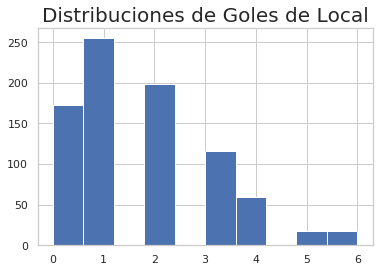

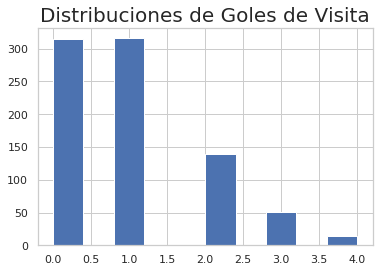

In [0]:
matches = wc_matches_info.table
wc = wc_info.table

matches.goles_del_equipo_local.hist()
plt.title('Distribuciones de Goles de Local', fontsize=20)
save_graph(modify_text('Distribuciones de Goles de Local'))
plt.show()

print()

matches.goles_del_equipo_visitante.hist()
plt.title('Distribuciones de Goles de Visita', fontsize=20)
save_graph(modify_text('Distribuciones de Goles de Visita'))
plt.show()

## 6) Resultados por Países

Visualizar los resultados de los partidos por países (ganados, empatados, perdidos).

In [0]:
matches['ganador'] = np.nan
matches['perdedor'] = np.nan
matches['empate'] = False
for i in matches.index.values:
  if matches.iloc[i]['goles_del_equipo_local'] > matches.iloc[i]['goles_del_equipo_visitante']:
    matches.ganador[i] = matches.equipo_local[i]
    matches.perdedor[i] = matches.equipo_visitante[i]
  elif matches.iloc[i]['goles_del_equipo_local'] < matches.iloc[i]['goles_del_equipo_visitante']:
    matches.ganador[i] = matches.equipo_visitante[i]
    matches.perdedor[i] = matches.equipo_local[i]
  elif matches.iloc[i]['goles_del_equipo_local'] == matches.iloc[i]['goles_del_equipo_visitante']:
    matches.empate[i] = True

matches.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,año,fecha_y_hora,etapa,estadio,ciudad,equipo_local,goles_del_equipo_local,goles_del_equipo_visitante,equipo_visitante,comentarios_de_la_victoria,asistencia,goles_primer_tiempo,goles_segundo_tiempo,árbitro,asistente_1,asistente_2,id_ronda,id_partido,iniciales_local,iniciales_visita,hora,ganador,perdedor,empate
831,2014.0,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL,13:00,Argentina,Belgium,False
832,2014.0,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX,13:00,Netherlands,Mexico,False
833,2014.0,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE,17:00,NaN,NaN,True
834,2014.0,2014-07-01 13:00:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI,13:00,Argentina,Switzerland,False
835,2014.0,2014-07-01 17:00:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA,17:00,Belgium,USA,False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


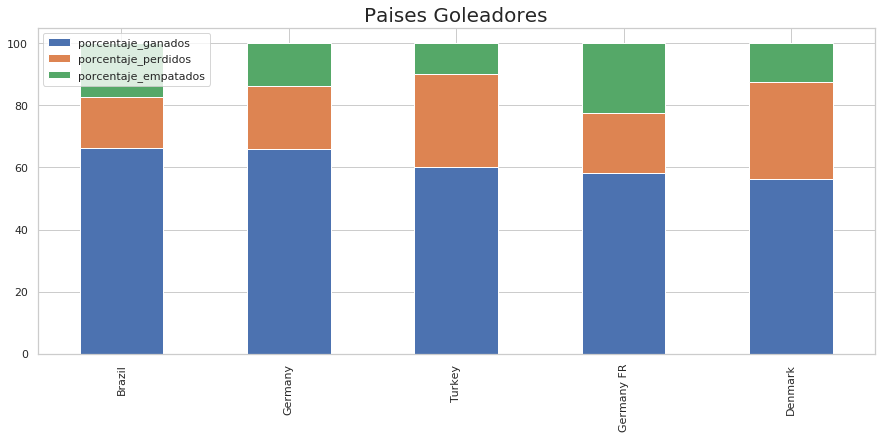

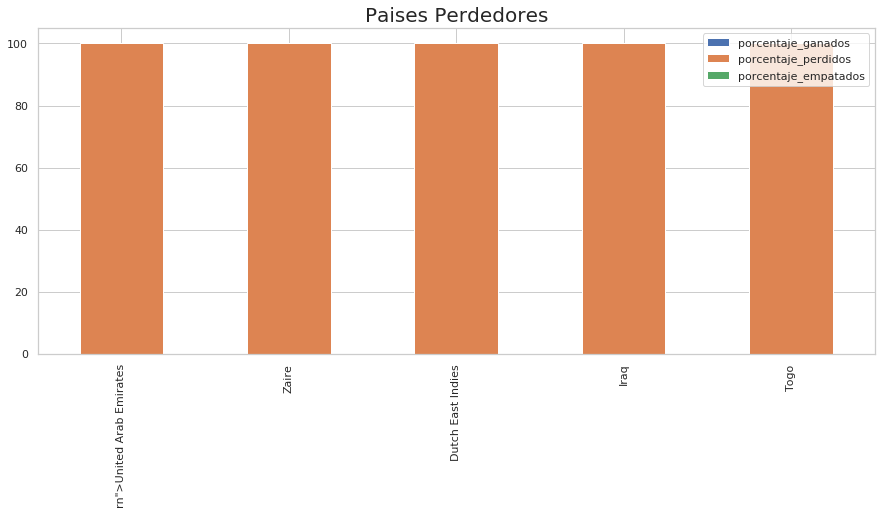

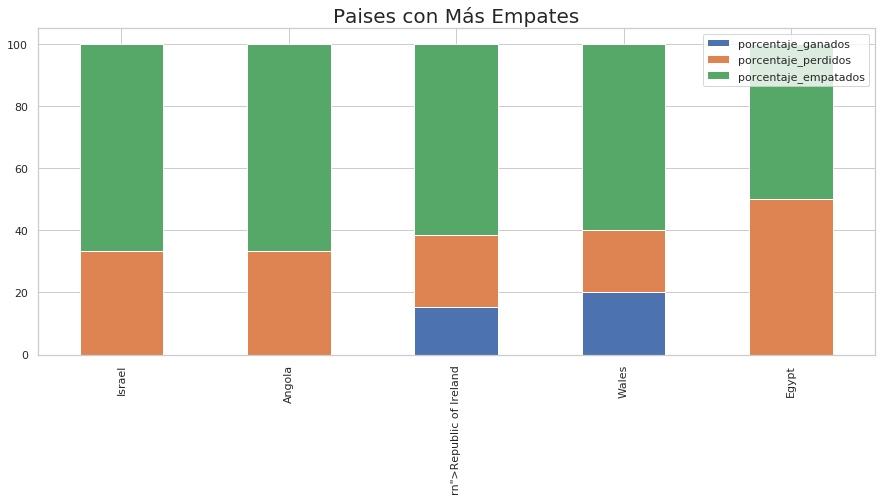

In [0]:
paises = np.sort(pd.concat([matches.equipo_visitante, matches.equipo_local]).unique())
por_pais = pd.DataFrame({'pais': paises})

por_pais['partidos_ganados'] = 0
por_pais['partidos_perdidos'] = 0
por_pais['partidos_empatados'] = 0

empatados = matches[['equipo_local', 'equipo_visitante']][matches.empate == True]
serie_empatados = pd.concat([empatados.equipo_local,empatados.equipo_visitante]).value_counts()

for i in por_pais.index.values:
  por_pais['partidos_ganados'][i] = matches.ganador[matches.ganador == por_pais.pais[i]].count()
  por_pais['partidos_perdidos'][i] = matches.perdedor[matches.perdedor == por_pais.pais[i]].count()
  try:
    por_pais['partidos_empatados'][i] = serie_empatados[por_pais.pais[i]]
  except KeyError:
    pass


por_pais['diferencia_puntos'] = por_pais.partidos_ganados - por_pais.partidos_perdidos
por_pais['total_partidos'] = por_pais.partidos_empatados + por_pais.partidos_ganados + por_pais.partidos_perdidos
por_pais['porcentaje_ganados'] = (por_pais.partidos_ganados * 100) / por_pais.total_partidos
por_pais['porcentaje_perdidos'] = (por_pais.partidos_perdidos * 100) / por_pais.total_partidos
por_pais['porcentaje_empatados'] = (por_pais.partidos_empatados * 100) / por_pais.total_partidos

scorers = por_pais.sort_values('porcentaje_ganados', ascending=False).iloc[:5,:]
scorers.iloc[:,6:9].plot.bar(figsize=(15,6), rot=90, stacked=True)

plt.title('Paises Goleadores', fontsize=20)
plt.xticks(np.arange(len(scorers.index.values)), scorers.pais)
save_graph(modify_text('paises goleadores'))
plt.show()
print()

losers = por_pais.sort_values('porcentaje_perdidos', ascending=False).iloc[:5,:]
losers.iloc[:,6:9].plot.bar(figsize=(15,6), rot=90, stacked=True)

plt.title('Paises Perdedores', fontsize=20)
plt.xticks(np.arange(len(losers.index.values)), losers.pais)
save_graph(modify_text('paises perdedores'))
plt.show()
print()

tiers = por_pais.sort_values('porcentaje_empatados', ascending=False).iloc[:5,:]
tiers.iloc[:,6:9].plot.bar(figsize=(15,6), rot=90, stacked=True)

plt.title('Paises con Más Empates', fontsize=20)
plt.xticks(np.arange(len(tiers.index.values)), tiers.pais)
save_graph(modify_text('paises con más empates'))
plt.show()
print()

pass


## 7) Análisis de Año y Ciudad de Eventos Mundialistas

Realice tanto Cross - Table como Pivot - Table para mejorar su análisis en base a elementos como por ejemplo, año y ciudad del evento mundialista.

In [0]:
# Cantidad de partidos por ciudad en cada año:

table = pd.pivot_table(wc_matches_info.table, index=['año'], columns=['ciudad'], aggfunc='count', values='id_partido')

table.head()

ciudad,Alicante,Antibes,Arica,Barcelona,Bari,Basel,Belo Horizonte,Berlin,Berlin West,Berne,Bilbao,Birmingham,Bologna,Boras,Bordeaux,Boston,Brasilia,Buenos Aires,Busan,Cagliari,Cape Town,Chicago,Cologne,Colombes,Cordoba,Cuiaba,Curitiba,Daegu,Daejeon,Dallas,Detroit,Dortmund,Durban,Dï¿œSseldorf,Elche,Eskilstuna,Florence,Fortaleza,Frankfurt/Main,Gelsenkirchen,...,Rifu,Rio De Janeiro,Rome,Rosario,Saint-Denis,Saint-Etienne,Saitama,Salvador,San Francisco,Sandviken,Santiago De Chile,Sao Paulo,Sapporo,Seoul,Seville,Sheffield,Shizuoka,Solna,Strasbourg,Stuttgart,Sunderland,Suwon,Toluca,Toulouse,Trieste,Tshwane/Pretoria,Turin,Udevalla,Udine,Ulsan,Valencia,Valladolid,Vasteras,Verona,Vigo,Vina Del Mar,Washington Dc,Yokohama,Zaragoza,Zurich
año,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [0]:
table.describe().loc['max',:]

ciudad
Alicante          3.0
Antibes           1.0
Arica             7.0
Barcelona         8.0
Bari              5.0
                 ... 
Vina Del Mar      8.0
Washington Dc     5.0
Yokohama          4.0
Zaragoza          3.0
Zurich            5.0
Name: max, Length: 151, dtype: float64

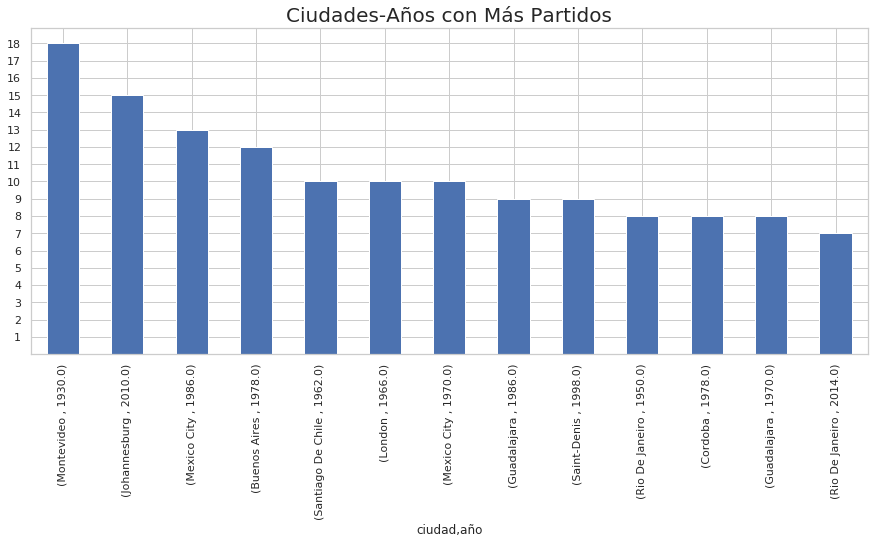

In [0]:
# Gráfico

table = pd.pivot_table(wc_matches_info.table, index=['ciudad'], columns=['año'], aggfunc='count', values='id_partido')
table['maximos_ciudad'] = table.max(axis='columns')

table.sort_values('maximos_ciudad', inplace=True, ascending=False)

table.drop(columns='maximos_ciudad', inplace=True)
table.iloc[:10,:].stack('año').sort_values(ascending=False).plot\
.bar(figsize=(15,6), rot=90)
plt.title('Ciudades-Años con Más Partidos', fontsize=20)
# plt.yticks(table.iloc[:10,:].stack('año').values, [int(x) for x in table.iloc[:10,:].stack('año').values])
plt.yticks(np.arange(1,19), np.arange(1,19))
save_graph(modify_text('ciudades años con más partidos'))
plt.show()

## 8) Análisis de Jugadores

Realice un análisis de los jugadores con las mejores estadísticas según los mundiales disputados (participaciones, rendimiento, etc).

### Análisis de Participación

#### Participación en Partidos (Titulares o Suplentes)

,id_partido
nombre_jugador,
RONALDO,33
KLOSE,28
CAFU,26
Sepp MAIER,25
DIDA,25
LEAO,25
Mï¿œLLER,24
Wladyslaw ZMUDA,24
SILVA,24


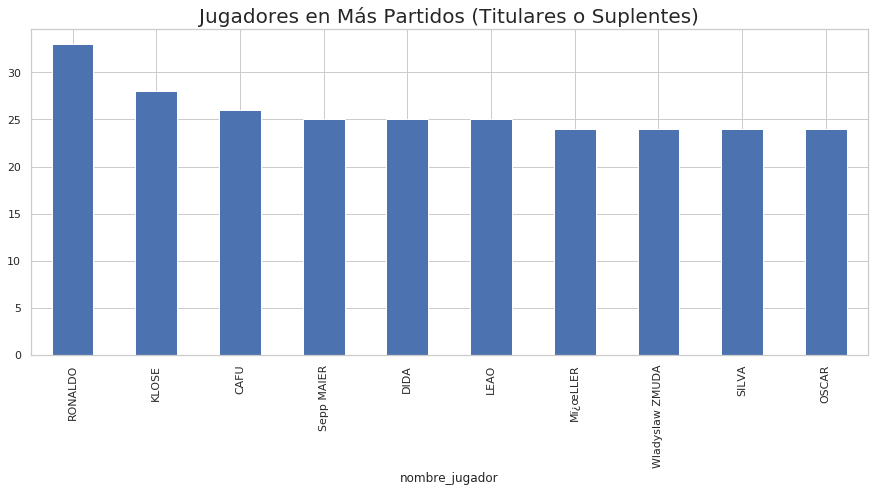

In [0]:
players = wc_players_info.table

ppal_players = players[['id_partido', 'nombre_jugador']]\
  .groupby('nombre_jugador').count()\
  .sort_values('id_partido', ascending=False).iloc[:10]

display(ppal_players)
ppal_players.plot.bar(figsize=(15,6), legend=None)
plt.title('Jugadores en Más Partidos (Titulares o Suplentes)', fontsize=20)
save_graph(modify_text('Jugadores en Más Partidos (Titulares o Suplentes)'))
plt.show()

#### Participaciones como Titular


,id_partido
nombre_jugador,
RONALDO,26
KLOSE,22
Diego MARADONA,21
Uwe SEELER,21
Wladyslaw ZMUDA,20
Grzegorz LATO,20
LAHM,20
Wolfgang OVERATH,19
OSCAR,19


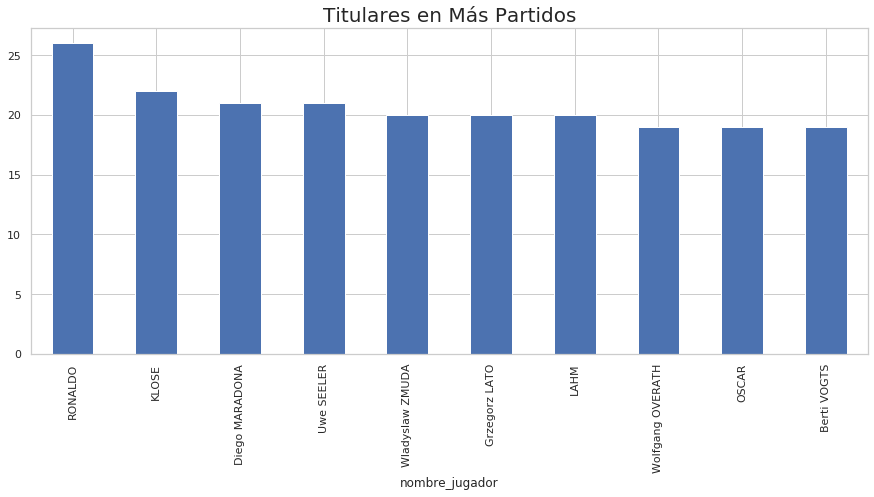

In [0]:
game_holders = players[players.titularidad == 'S']
ppal_game_holders = game_holders[['id_partido', 'nombre_jugador']]\
  .groupby('nombre_jugador').count()\
  .sort_values('id_partido', ascending=False).iloc[:10]

display(ppal_game_holders)
ppal_game_holders.plot.bar(figsize=(15,6), legend=None)
plt.title('Titulares en Más Partidos', fontsize=20)
save_graph(modify_text('titulares en más partidos'))
plt.show()


### Análisis de Rendimiento

In [0]:
# Creación de columnas con datos de eventos:
players['goles'] = players.evento.str.count('G')
players['penales'] = players.evento.str.count('P')
players['anotaciones'] = players.goles + players.penales

players['penales_perdidos'] = players.evento.str.count('MP')
players['autogoles'] = players.evento.str.count('OG')
players['puntos_perdidos'] = players.penales_perdidos + players.autogoles

players['tarjetas_amarillas'] = players.evento.str.count('Y')
players['tarjetas_rojas'] = players.evento.str.count('R')
players['segundas_amarillas'] = players.evento.str.count('SY')
players['total_tarjetas'] = players.tarjetas_amarillas + players.tarjetas_rojas\
   + players.segundas_amarillas

#### Análisis por Cantidad de Anotaciones (Goles y Penales)

,goles,penales,anotaciones
nombre_jugador,,,
RONALDO,16.0,1.0,17.0
KLOSE,16.0,0.0,16.0
Gerd MUELLER,13.0,1.0,14.0
Just FONTAINE,13.0,0.0,13.0
PELï¿œ (Edson Arantes do Nascimento),12.0,0.0,12.0
Mï¿œLLER,10.0,1.0,11.0
Sandor KOCSIS,11.0,0.0,11.0
Gary LINEKER,8.0,2.0,10.0
Teofilo CUBILLAS,8.0,2.0,10.0


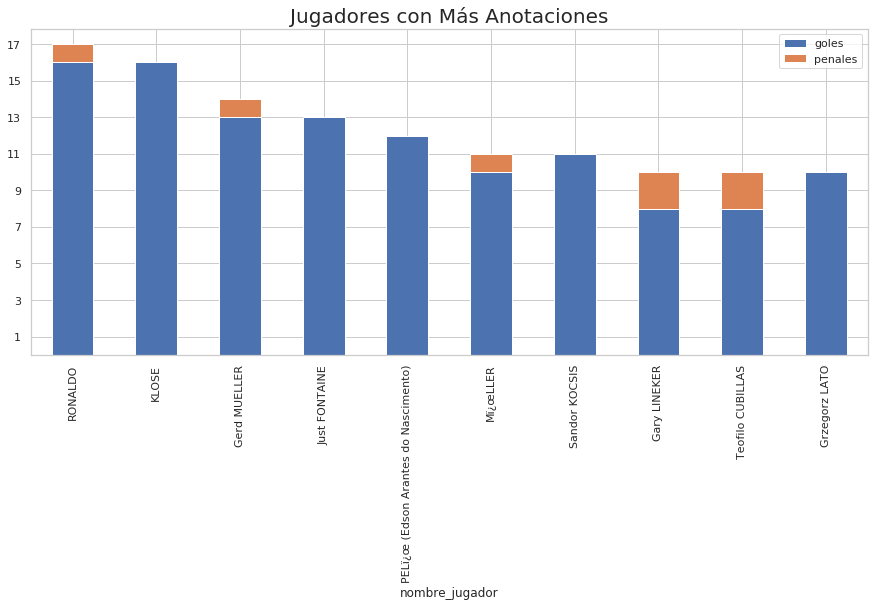

In [0]:
players_annotations = players.groupby('nombre_jugador')\
  .sum()[['goles','penales', 'anotaciones']]\
  .sort_values('anotaciones', ascending=False)

# Se muestra la tabla:
display(players_annotations[:10])
# Se genera el gráfico:
players_annotations.iloc[:10,0:2].plot.bar(figsize=(15,6), rot=90, stacked=True)

# Configuración del gráfico:
plt.title('Jugadores con Más Anotaciones', fontsize=20)
plt.yticks(np.arange(1,18,2), np.arange(1,18,2))
save_graph(modify_text('jugadores con más anotaciones'))
plt.show()

#### Análisis de Autogoles y Penales Perdidos




,autogoles,penales_perdidos,puntos_perdidos
count,7663.0,7663.000000,7663.000000
mean,0.0,0.001435,0.001435
std,0.0,0.037863,0.037863
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.000000
max,0.0,1.000000,1.000000


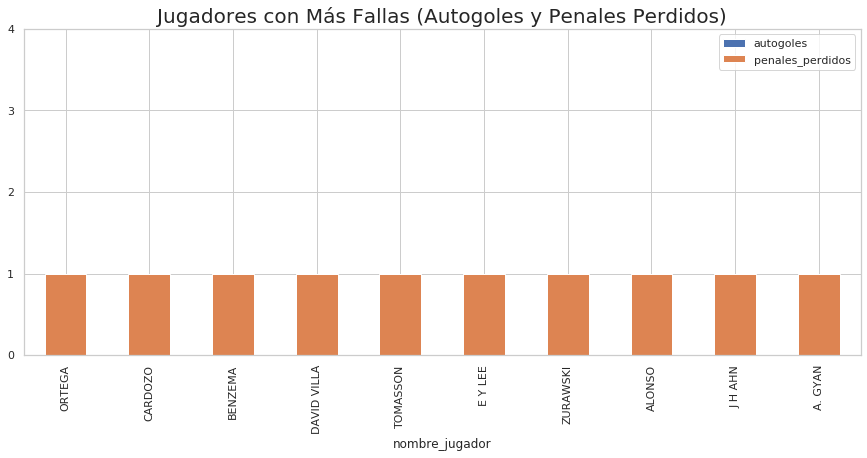

In [0]:
players_failures = players.groupby('nombre_jugador')\
  .sum()[['autogoles','penales_perdidos','puntos_perdidos']]\
  .sort_values('puntos_perdidos', ascending=False)

# Se muestra la tabla:
display(players_failures.describe())
# Se genera el gráfico:
players_failures.iloc[:10,0:2].plot.bar(figsize=(15,6), rot=90, stacked=True)

# Configuración del gráfico:
plt.title('Jugadores con Más Fallas (Autogoles y Penales Perdidos)', fontsize=20)
plt.yticks(np.arange(0,5), np.arange(0,5))
save_graph(modify_text('jugadores con más fallas'))
plt.show()

#### Análisis por Tarjetas

,tarjetas_amarillas,tarjetas_rojas,segundas_amarillas,total_tarjetas
nombre_jugador,,,,
PAREDES,6.0,1.0,1.0,8.0
V. BRONCKHORST,6.0,1.0,1.0,8.0
BOULAHROUZ,5.0,1.0,1.0,7.0
COSTINHA,5.0,1.0,1.0,7.0
ASAMOAH,5.0,1.0,1.0,7.0
W. PALACIOS,5.0,1.0,1.0,7.0
Stefan SCHWARZ,5.0,1.0,1.0,7.0
Ricardo GIUSTI,5.0,1.0,1.0,7.0
HEITINGA,5.0,1.0,1.0,7.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


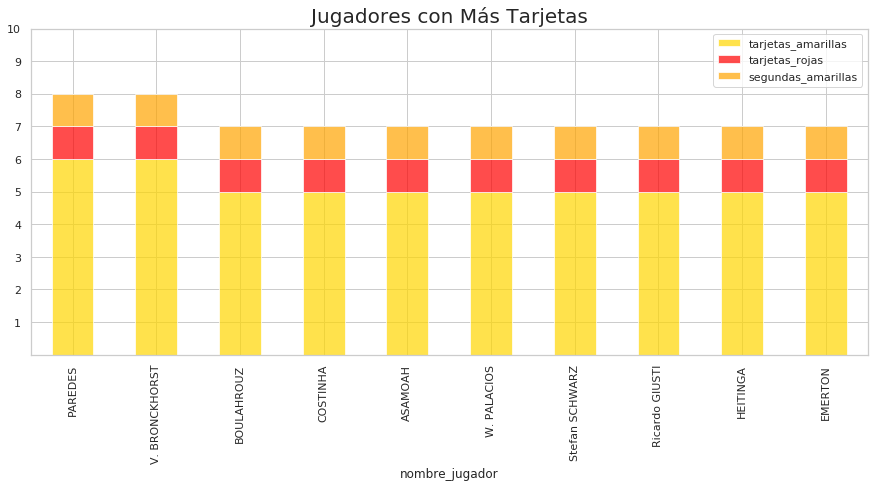

In [0]:
players_cards = players.groupby('nombre_jugador')\
  .sum()[['tarjetas_amarillas','tarjetas_rojas','segundas_amarillas', 'total_tarjetas']]\
  .sort_values('total_tarjetas', ascending=False)

# Se muestra la tabla:
display(players_cards[:10])
# Se genera el gráfico:
players_cards.iloc[:10,0:3].plot.bar(figsize=(15,6), rot=90, stacked=True, colors=['gold', 'red', 'orange'], alpha=0.7)

# Configuración del gráfico:
plt.title('Jugadores con Más Tarjetas', fontsize=20)
plt.yticks(np.arange(1,11), np.arange(1,11))
save_graph(modify_text('jugadores con más tarjetas'))
plt.show()

## 9) Dependencia Lineal Entre Variables

Evalúe dependencia lineal entre las variables de cada BBDD y obtenga una relación para determinar el ganador de cada partido. Relacione el máximo goleador del mundial con el ganador del torneo.

### Dependencia Lineal Entre Variables de Cada Base de Datos

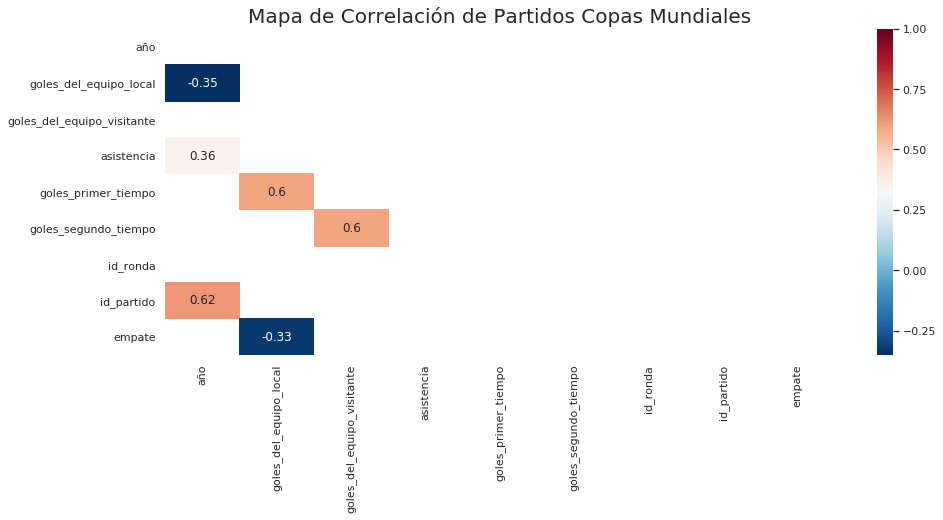

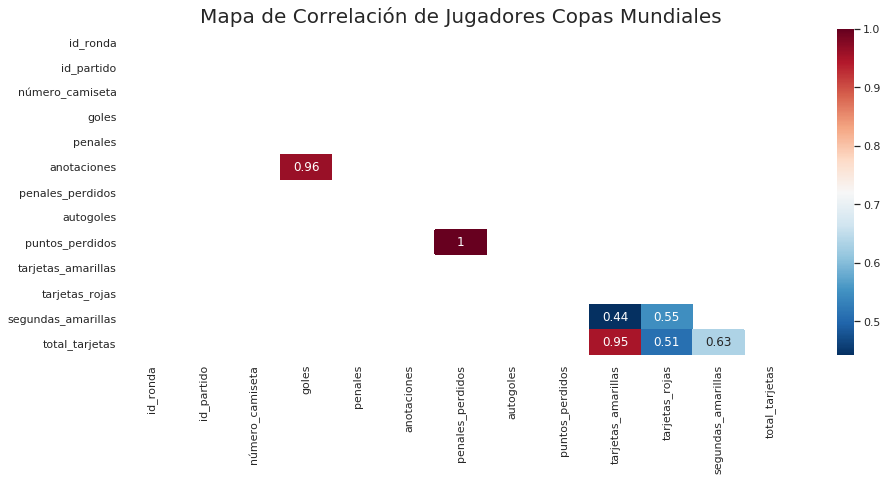

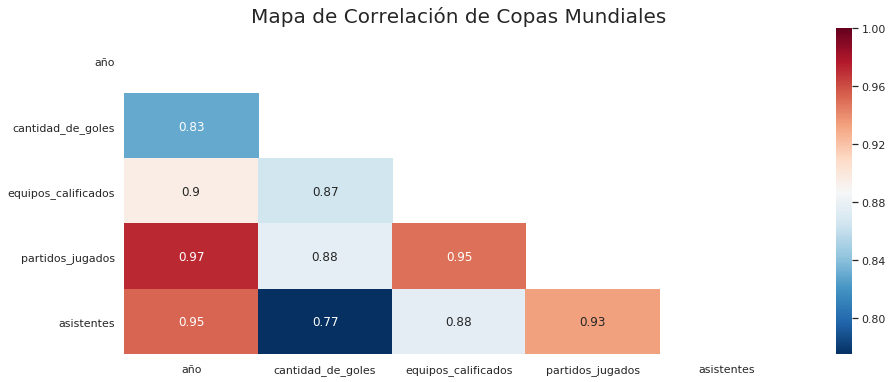

In [0]:
# Creación de mapas de correlación para cada tabla:
for db in dbs:
  correlation_map(db.table, f'Mapa de Correlación de {db.name}')

### Relación para Determinar el Ganador de Cada Partido

In [0]:
for db in dbs:
  print(db.name, db.table.columns)

Partidos Copas Mundiales Index(['año', 'fecha_y_hora', 'etapa', 'estadio', 'ciudad', 'equipo_local',
       'goles_del_equipo_local', 'goles_del_equipo_visitante',
       'equipo_visitante', 'comentarios_de_la_victoria', 'asistencia',
       'goles_primer_tiempo', 'goles_segundo_tiempo', 'árbitro', 'asistente_1',
       'asistente_2', 'id_ronda', 'id_partido', 'iniciales_local',
       'iniciales_visita', 'hora', 'ganador', 'perdedor', 'empate'],
      dtype='object')
Jugadores Copas Mundiales Index(['id_ronda', 'id_partido', 'iniciales_equipo', 'nombre_entrenador',
       'titularidad', 'número_camiseta', 'nombre_jugador', 'posición',
       'evento', 'goles', 'penales', 'anotaciones', 'penales_perdidos',
       'autogoles', 'puntos_perdidos', 'tarjetas_amarillas', 'tarjetas_rojas',
       'segundas_amarillas', 'total_tarjetas'],
      dtype='object')
Copas Mundiales Index(['año', 'país', 'ganador', 'segundo_lugar', 'tercer_lugar',
       'cuarto_lugar', 'cantidad_de_goles', 'equipos_

In [0]:
matches['iniciales_ganador'] = np.nan

for i in matches.index.values:
  if matches.iloc[i]['goles_del_equipo_local'] > matches.iloc[i]['goles_del_equipo_visitante']:
    matches.iniciales_ganador[i] = matches.iniciales_local[i]

  elif matches.iloc[i]['goles_del_equipo_local'] < matches.iloc[i]['goles_del_equipo_visitante']:
    matches.iniciales_ganador[i] = matches.iniciales_visita[i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [0]:
matches.head()


,año,fecha_y_hora,etapa,estadio,ciudad,equipo_local,goles_del_equipo_local,goles_del_equipo_visitante,equipo_visitante,comentarios_de_la_victoria,asistencia,goles_primer_tiempo,goles_segundo_tiempo,árbitro,asistente_1,asistente_2,id_ronda,id_partido,iniciales_local,iniciales_visita,hora,ganador,perdedor,empate,iniciales_ganador
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15:00,France,Mexico,False,FRA
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15:00,USA,Belgium,False,USA
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,12:45,Yugoslavia,Brazil,False,YUG
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,14:50,Romania,Peru,False,ROU
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,16:00,Argentina,France,False,ARG


In [0]:
players.sum()

id_ronda                                                   132707575239
id_partido                                                2182968847007
iniciales_equipo      FRAMEXFRAMEXFRAMEXFRAMEXFRAMEXFRAMEXFRAMEXFRAM...
nombre_entrenador     CAUDRON Raoul (FRA)LUQUE Juan (MEX)CAUDRON Rao...
titularidad           SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNSSSSSSSSSSSSS...
número_camiseta                                                  396440
nombre_jugador        Alex THEPOTOscar BONFIGLIOMarcel LANGILLERJuan...
goles                                                              2163
penales                                                             186
anotaciones                                                        2349
penales_perdidos                                                     11
autogoles                                                             0
puntos_perdidos                                                      11
tarjetas_amarillas                                              

In [0]:
players_grouped = players.groupby(['id_partido', 'iniciales_equipo']).sum().loc[:,'goles':].reset_index()
players_grouped.head()

,id_partido,iniciales_equipo,goles,penales,anotaciones,penales_perdidos,autogoles,puntos_perdidos,tarjetas_amarillas,tarjetas_rojas,segundas_amarillas,total_tarjetas
0,25,ARG,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
1,25,BRA,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0
2,26,ARG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,26,CMR,1.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,5.0
4,27,ARG,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,5.0


In [0]:
players_matches = matches.merge(players_grouped)
players_matches.head()

,año,fecha_y_hora,etapa,estadio,ciudad,equipo_local,goles_del_equipo_local,goles_del_equipo_visitante,equipo_visitante,comentarios_de_la_victoria,asistencia,goles_primer_tiempo,goles_segundo_tiempo,árbitro,asistente_1,asistente_2,id_ronda,id_partido,iniciales_local,iniciales_visita,hora,ganador,perdedor,empate,iniciales_ganador,iniciales_equipo,goles,penales,anotaciones,penales_perdidos,autogoles,puntos_perdidos,tarjetas_amarillas,tarjetas_rojas,segundas_amarillas,total_tarjetas
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15:00,France,Mexico,False,FRA,FRA,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15:00,France,Mexico,False,FRA,MEX,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15:00,USA,Belgium,False,USA,BEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15:00,USA,Belgium,False,USA,USA,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,12:45,Yugoslavia,Brazil,False,YUG,BRA,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


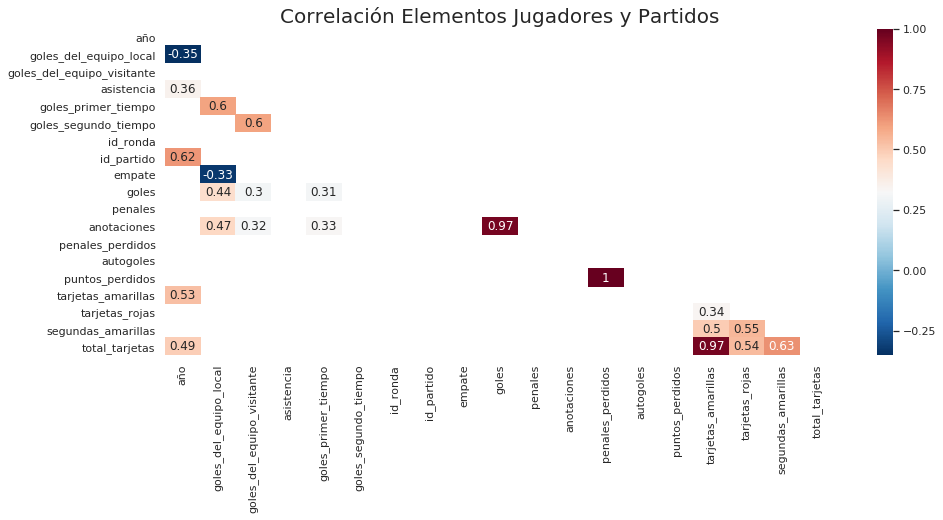

In [0]:
correlation_map(players_matches, 'Correlación Elementos Jugadores y Partidos')

## 10) Realizar un Reporte (En PDF)